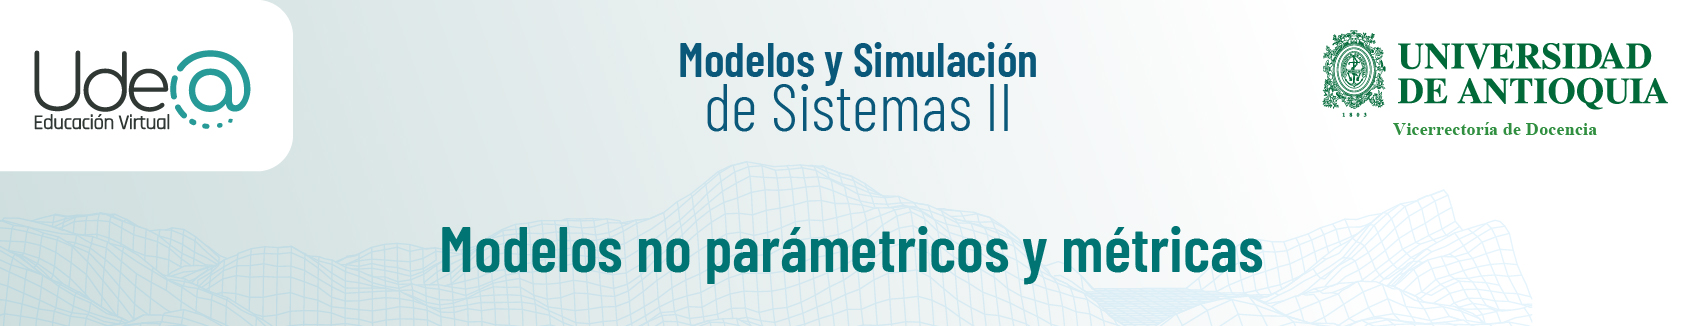

# <font size= 1> <font color='FFFFFF'> **Modelos no parámetricos**

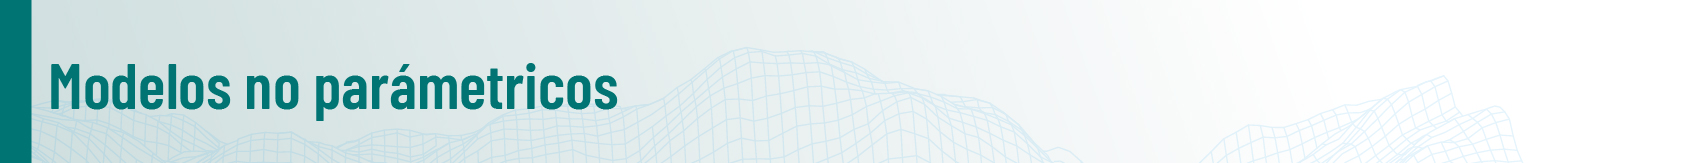

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Image


import scipy
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import hist, show
import warnings
warnings.filterwarnings("ignore")



from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

CMAP_LIGHT = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])

In [ ]:
def distance_vectors(x, X):
    return np.linalg.norm(x - X)


def U(x, X, h):
    return (distance_vectors(x, X)/h)


def kernel_gauss(u):
    return math.exp((-0.5)*math.pow(u, 2))


def parzenW(X, x, h):
    N = len(X)
    accumulator = 0
    for i in range(N):
        accumulator = accumulator + kernel_gauss(U(x, X[i], h))
    return accumulator/N

## <font color='007473'>**Método de $k$-vecinos más cercanos** </font>

1.   Elemento de la lista
2.   Elemento de la lista



Los $k$ vecinos más cercanos son un algoritmo simple que almacena todos las muestras disponibles y predice un valor objetivo con base en alguna medida de similaridad. La suposición fundamental de este tipo de métodos es que los cambios de la función (modelo) que describe el comportamiento son suaves. Por consiguiente, se asume que el comportamiento de un punto puede ser estimado como el promedio del comportamiento de sus $k$-vecinos.

Usaremos el dataset Iris para el problema de clasificación. En el UCI Machine Learning Repository se encuentra más información: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
# Datos de Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target
x_min, x_max = X[:, 1].min() - .1, X[:, 1].max() + .1
y_min, y_max = X[:, 2].min() - .1, X[:, 2].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

In [ ]:
# KNN
def DiscriminatorKNN(k=3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X[:,1:3], y) 
    Z = np.zeros((100,100))
    print('Calculando ... ')
    #Evaluando las fdp's en una malla de valores
    for i in range(100):
        for j in range(100):
            #print([xx[1,i],yy[j,1]])
            Z[i,j]=neigh.predict([[xx[1,i],yy[j,1]]])
    print('Listo')        
    plt.figure()
    plt.title(u'Clasificación k-vecinos, k = '+ str(k), fontsize=14)
    plt.xlabel(u'Característica 1')
    plt.ylabel(u'Característica 2')
    plt.pcolormesh(xx, yy, Z.T, cmap=CMAP_LIGHT)
    plt.scatter(X[:,1], X[:,2], c=y);
interact(DiscriminatorKNN, k=[1,2,3,4,5,10,20,100,150]);  

**El método de ventana de Parzen**

In [ ]:
# Efecto de la ventana de parzen
def DistributionPW(h=0.5):
    mu1, sigma1 = 0, 0.3
    mu2, sigma2 = 3, 0.5
    np.random.seed(1)
    Normal1 = np.random.normal(mu1, sigma1, 200)
    Normal2 = np.random.normal(mu2, sigma2, 200)
    
    X = np.append(Normal1,Normal2)
    fig, ((ax1, ax2)) = plt.subplots(1, 2) 

    x = sorted(np.random.randn(200) +2 )
    pred = list()
    for i in range(len(x)):
        pred.append(parzenW(X,x[i],h))
    ax2.plot(x,pred,'-o')
    ax1.hist(Normal1,color='steelblue')
    ax1.hist(Normal2,color='steelblue')
    fig.show()
interact(DistributionPW, h=[0.01,0.05,0.1,0.5,1,2,3,4,5,6]); 

In [ ]:
# Clasificación con Ventana de Parzen
def DiscriminatorParzen(h=0.01):
    print("Calculando...")
    Z = np.zeros((100,100))
    #Evaluando las fdp's en una malla de valores
    plt.clf()
    for i in range(100):
        for j in range(100):
            p1 = parzenW(X[:50,1:3],[xx[1,i],yy[j,1]],h)
            p2 = parzenW(X[50:100,1:3],[xx[1,i],yy[j,1]],h)
            p3 = parzenW(X[100:150,1:3],[xx[1,i],yy[j,1]],h)
            p = np.array([p1,p2,p3]);
            Z[i,j]= p.argmax(axis=0)
    print('Listo.')        
    plt.figure()
    plt.title(u'Clasificación Ventana de Parzen h = ' + str(h), fontsize=14)
    plt.xlabel(u'Característica 1')
    plt.ylabel(u'Característica 2')
    plt.pcolormesh(xx, yy, Z.T, cmap=CMAP_LIGHT)
    plt.scatter(X[:,1], X[:,2], c=y);
    plt.show()
interact(DiscriminatorParzen, h=[0.001,0.01,0.1,1,2,3,4,5,6]); 

# <font size= 1> <font color='FFFFFF'> **Métricas de evaluación**

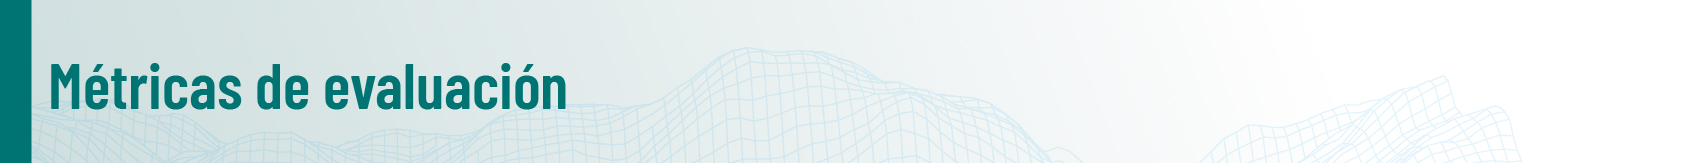

## <font color='007473'>**Matriz de confusión**
Convensión: clase positiva y clase negativa, permite evaluar el desempeño de un modelo.

In [ ]:
# Generación de datos 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

N = 500
Cov = np.identity(2) * 1.1
Cov2 = np.array([[1.1,0.5],[0.5,1.1]])
Mean = [1.1,2.1]
Mean2 = [4.1,4.1]
x, y  = np.random.multivariate_normal(Mean, Cov, N).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
Y = Y.flatten()
# Modelo
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y.flatten())
y_pred = clf.predict(X)

**Representación gráfica de la matriz de confusión**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

titles_options = [("Confusion matrix, without normalization", True, False),
                  ("Normalized confusion matrix", False, True)]

class_names=['class_1','class_2']
multiclass = confusion_matrix(Y, y_pred)

for title, absolute, normalize in titles_options:
     fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=absolute,
                                show_normed=normalize)
     print(title)
     plt.show()


Se puede ver que el 95 % de la class_1 son clasificadas correctamente.

**Medidas derivadas de la matriz de confusión:**


- Sensibilidad (Recall) = True Positive Rate (TPR) = $$\frac{TP}{TP+FN}$$

- Precisión = Positive Predictive Value (PPV)$$\frac{TP}{TP+FP}$$

- Especificidad (solo en problemas biclase) = $$\frac{TN}{TN+FP}$$

- False Positve Rate (FPR) = $$1 - Especificidad$$

- Exactitud (Accuracy) = $$\frac{TP + TN}{TP+TN+FP+FN}$$

- F1 score =
$$F_\beta = (1+\beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall}$$

La más usada es para $\beta = 1$ que le da igual importancia a la precisión y a la sensibilidad.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy = '+str(accuracy_score(Y,y_pred)))
print('Precision = '+str(precision_score(Y,y_pred)))
print('Recall = '+str(recall_score(Y,y_pred)))
print('F_1 = '+str(f1_score(Y,y_pred)))

## <font color='007473'>**Problemas desbalanceados**
Se presentan cuando, para el entrenamiento de un modelo de aprendizaje automático en un problema de clasificación, una de las clases tiene siginificativamente más muestras que las otras. Se prefiere usar como medida global de desempeño del sistema alguna de las siguientes:

- Matthews Correlation Coefficient (MCC) = $$\frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP + FP)(TP+FN)(TN+FP)(TN+FN)}}$$

- Balanced Accuracy (BACC) = $$\frac{TP}{2(TP + FN)} + \frac{TN}{2(TN + FP)}$$
  En general, se estima como el promedio del Recall por clase.


- G_mean (media geométrica) = $$\sqrt{Sensibilidad \cdot Especificidad}$$

In [ ]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score
print('MCC = '+str(matthews_corrcoef(Y,y_pred)))
print('BACC = '+str(balanced_accuracy_score(Y,y_pred)))

**<font color='blue'>Para compensar el problema del desbalance también se pueden usar:</font>**


- **Técnicas de submuestreo inteligente.** 
- **Técnicas de sobremuestreo inteligente.**
- **Técnicas de muestreo apropiadas durante la validación.** 
- **Pesos diferentes para el error durante el entrenamiento.**

Revisar la librería [imbalanced-learn](https://imbalanced-learn.org/stable/), la cual contiene varios métodos implementados para sub y sobremuestreo.

## <font color='007473'> **ROC Curve**

La curva ROC (Receiver Operator Characteristic) se utiliza como una medida de desempeño esperada de un sistema de clasificación. La grafica muestra el desempeño en términos de "Sensibilidad vs. 1 - Especificidad" para diferentes umbrales de decisión. El área bajo la curva ROC (AUC) se usa como medida de desempeño en varias aplicaciones.

In [ ]:
from sklearn.metrics import roc_curve, auc
mean = [0,0.5,1,2]
N = 200
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
plt.figure(figsize=(20,8))
for k,i in enumerate(mean):
    x1 = np.random.randn(N) + i
    x2 = np.random.randn(N) - i
    plt.subplot(2,4,k+1)
    _ = plt.hist(x1, bins=30,rwidth=0.9,alpha=0.5, label= 'P_scores')
    _ = plt.hist(x2, bins=30,rwidth=0.9,alpha=0.5, label = 'N_scores')
    plt.legend()
    plt.subplot(2,4,k+5)
    score = np.r_[x1,x2]
    tpr,fpr,_ = roc_curve(Y, score)
    roc_auc = 1 - auc(fpr, tpr)
    plt.plot(tpr,fpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.grid()
plt.show()

## <font color='007473'> **Problemas de regresión**
- Mean Square Error (MSE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - f({\bf{x}}_i) \right)^2 $$


- Mean Absolute Error (MAE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left|y_i - f({\bf{x}}_i) \right| $$


- Median Absolute Error (MedAE) $$ E = \text{median}\left( |y_1 - f({\bf{x}}_1)|, \cdots, |y_N - f({\bf{x}}_N)| \right) $$

  Es más rebusta frente a datos atípicos que MAE.<br> <br> 

- Mean Absolute Percentage Error (MAPE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left|\frac{y_i - f({\bf{x}}_i) }{y_i}\right| $$


- Coefficient of determination ($R^2$) $$ R^2 = 1 - \frac{\sum_{i=1}^{N} \left(y_i - f({\bf{x}}_i) \right)^2}{\sum_{i=1}^{N} \left(y_i - \bar{y}) \right)^2}$$
 donde $\bar{y}$ es el promedio de los $y_i$

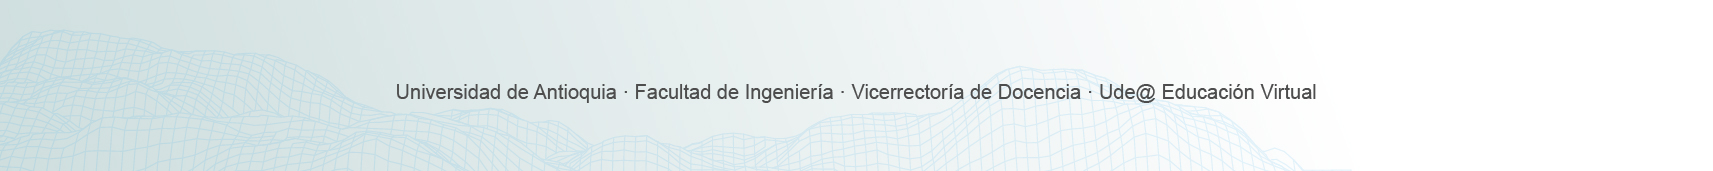